In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

## 샤넬

In [3]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', sep ='|', encoding = 'utf-8')

In [4]:
mag_ch['word'] = mag_ch['word_chanel']

In [5]:
mag_CH = mag_ch[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [10]:
len(mag_CH)

1450

In [55]:
for i in range(len(mag_CH)):
    if '예쁜' in mag_CH.loc[i, 'ADFN_2']:
        print(i, mag_CH.loc[i, 'ADFN_2'])
        print('-'* 50)

24 ['간', '얼루어', '그린', '이슈', '얼루어', '그린', '캠페인', '진행', '많은', '부분', '많은', '습관', '몸', '에코', '텀블러', '사용', '일상생활', '신경', '대부분', '편이', '포장재', '잔뜩', '새벽', '배송', '서비스', '배달', '음식', '서비스', '이용', '그럼에도', '포기', '없는', '아이템', '소비', '예쁜', '걸', '없었다', '미니멀리즘', '유혹', '환경윤리', '갈등', '고민', '끝', '결론', '걸', '좋아하는', '문학', '영화', '미식', '여행', '좋아하듯', '옷', '신발', '가방', '좋아한다', '공통점', '좋아하는', '게', '게', '가끔', '슬펐다', '누군가', '천재', '있는데', '이유', '쓸데없는', '취급', '좋은', '개성', '부여', '블라우스', '펌프스', '디테일', '금세', '감동', '지갑', '연', '그랬기에', '제인', '폰다', '선언', '더없이', '아프게', '감동', '구매', '옷', '신발', '가방', '끊임없이', '유행', '변덕', '나이', '여러', '이유', '짐', '더미', '이기', '친한', '에디터', '스타일', '리스트', '에디터', '스', '마켓', '이름', '플리', '마켓', '열기', '기부', '플리', '마켓', '장사', '그럼에도', '리지', '늘', '있고', '짐', '더미', '소비', '있고', '소비', '물건', '생명력', '마련', '거', '이건', '수도', '없고', '쓰레기', '탄소', '발생', '제인', '폰', '다처', '럼', '앞', '옷', '안', '산다', '선언', '물건', '관리', '어떨까', '안', '옷', '새로운', '생명', '부여', '수도', '있지', '그렇다면', '죄책감', '작년', '코펜하겐', '거리', '수많은', '빈티지지숍', '정체', '알', '없는

In [ ]:
'예쁘고', '예쁘진', '예쁘냐가', '예쁘게', '예쁘면서도', '예쁜'

In [ ]:
'귀여운', '귀엽고', '귀여워서', '귀여워'

## 리사

### 리사 (유튜브 + 매거진)

In [6]:
tot_l = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [7]:
tot_l['word'] = tot_l['word_lisa']

In [8]:
tot_L = tot_l[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [9]:
len(tot_L)

197

### 샤넬 + 제니

In [11]:
CHL = pd.concat([mag_CH, tot_L])

In [12]:
CHL.reset_index(drop = True, inplace = True)

In [13]:
CHL.to_csv('./magazine/final/CHL.csv', sep = '|', encoding = 'utf-8', index = False)

In [14]:
len(CHL)

1647

## stopword 추가

In [27]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [28]:
sw_df.columns = ['stopword']

In [29]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [30]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [31]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [32]:
add_0 = ['해', '하는', '할', '한', '영상', '했다', '뭐', '넘', '수', '정말', '그냥', '보고', '있는',
         '전소민', '공유', '양세찬', '항상', '다시', '통해', '한편', 'a', '공개', '자체', '형', '와중', '↑', '걸',
         '있습니다', 'to', '아닌데', '있는데', '보기', '하다', '곤', '없어', '대한', '싶다', '명', '민','the',
         '보니', '아는', '전', '진짜', '멤버', '잘', '모습', '발음', '제일', '기자', '데뷔', '아는', '택시', 
         '활동', '썸네일', '나도', '가사', '하네요', '길다', '보이는', '까', '없는데', '몰랐는데', '대해', 
         '보인다', '위해', '로서', '이수근', '보여', '있으면', '보다', '같네', '하자', '최수영', 'that', 
         '하며', '세찬', '않고', '됨', '오는', '사이', '아주', '진행', '채', '이자',
        '진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히']
for w in add_0:
    stop_words.append(w)

In [33]:
add_1 = ['BLACKPINK', '제니', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [34]:
len(stop_words)

894

In [23]:
CHL['ADFN_2'] = CHL['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [35]:
noun_adj_list = []
for i in range(len(CHL)):
    for word in CHL.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [36]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('CHANEL', 5473), ('리사', 3581), ('브랜드', 985), ('KARL', 882), ('모델', 777), ('쇼', 765), ('장식', 727), ('백', 692), ('예쁘다', 679), ('드레스', 655), ('스타일', 571), ('룩', 566), ('컬러', 566), ('파리', 559), ('귀엽다', 543), ('블랙', 539), ('여성', 533), ('사랑', 522), ('트위드', 488), ('춤', 486), ('재킷', 474), ('디자이너', 473), ('디자인', 444), ('COUTURE', 440), ('매력', 433), ('주얼리', 423), ('세계', 407), ('아이템', 405), ('코코', 403), ('새로운', 396), ('한국', 391), ('하우스', 375), ('무대', 375), ('화이트', 369), ('옷', 367), ('시작', 354), ('GABRIELLE', 344), ('공방', 339), ('다양한', 335), ('럭셔리', 316), ('크루즈', 306), ('영감', 299), ('랩', 299), ('VIRGINIE', 293), ('영화', 290), ('스커트', 287), ('디렉터', 284), ('눈', 282), ('팬츠', 278), ('프랑스', 278), ('골드', 275), ('완성', 273), ('얼굴', 270), ('슈즈', 259), ('봄', 259), ('처음', 258), ('노래', 258), ('느낌', 257), ('가방', 254), ('여름', 251), ('영어', 251), ('링', 250), ('가죽', 250), ('클래식', 245), ('패션쇼', 245), ('많은', 240), ('HAUTE', 240), ('첫', 238), ('부츠', 236), ('착용', 236), ('슈트', 236), ('런웨이', 231), ('사용', 230), ('코트', 2

In [37]:
count = Counter(noun_adj_list)

In [38]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('CHANEL', 5473)
('리사', 3581)
('브랜드', 985)
('KARL', 882)
('모델', 777)
('쇼', 765)
('장식', 727)
('백', 692)
('예쁘다', 679)
('드레스', 655)
('스타일', 571)
('룩', 566)
('컬러', 566)
('파리', 559)
('귀엽다', 543)
('블랙', 539)
('여성', 533)
('사랑', 522)
('트위드', 488)
('춤', 486)
('재킷', 474)
('디자이너', 473)
('디자인', 444)
('COUTURE', 440)
('매력', 433)
('주얼리', 423)
('세계', 407)
('아이템', 405)
('코코', 403)
('새로운', 396)
('한국', 391)
('하우스', 375)
('무대', 375)
('화이트', 369)
('옷', 367)
('시작', 354)
('GABRIELLE', 344)
('공방', 339)
('다양한', 335)
('럭셔리', 316)
('크루즈', 306)
('영감', 299)
('랩', 299)
('VIRGINIE', 293)
('영화', 290)
('스커트', 287)
('디렉터', 284)
('눈', 282)
('팬츠', 278)
('프랑스', 278)
('골드', 275)
('완성', 273)
('얼굴', 270)
('슈즈', 259)
('봄', 259)
('처음', 258)
('노래', 258)
('느낌', 257)
('가방', 254)
('여름', 251)
('영어', 251)
('링', 250)
('가죽', 250)
('클래식', 245)
('패션쇼', 245)
('많은', 240)
('HAUTE', 240)
('첫', 238)
('부츠', 236)
('착용', 236)
('슈트', 236)
('런웨이', 231)
('사용', 230)
('코트', 225)
('워치', 220)
('핑크', 214)
('시대', 211)
('여자', 210)
('의상', 209)
('로고', 208

In [39]:
top500 = pd.DataFrame(word_list)

In [40]:
top500.columns = ['word', 'count']

In [42]:
top500.to_csv('./CHL_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [43]:
import matplotlib.pyplot as plt

In [44]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [45]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [46]:
from wordcloud import WordCloud

In [47]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

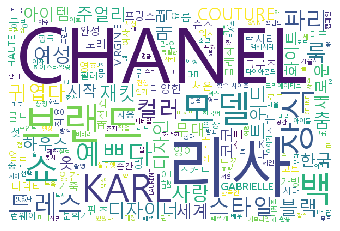

In [48]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_CHL_top500.png')

In [49]:
CHL.to_csv('./magazine/final/CHL_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)